In [1]:
## Import libraries
import numpy as np
import pandas as pd
import matplotlib as mpl; import matplotlib.pyplot as plt; from matplotlib import cm
import seaborn as sns
import datetime; from datetime import datetime

mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20) 

# Add this to python2 code to make life easier
from __future__ import absolute_import, division, print_function

## Read data:

In [2]:
df = pd.read_csv('redcard.csv') #Read it as a pandas dataframe

In [3]:
print(df.shape)
df.head(4)

(146028, 28)


,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


## Exploratory analysis

In [4]:
df.describe(include='all')

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
count,146028,146028,146028,146028,146028,145765.000000,143785.000000,128302,146028.000000,146028.000000,...,124621.000000,146028.000000,146028.000000,146027,145865.000000,1.458650e+05,1.458650e+05,145865.000000,1.458650e+05,145865.000000
unique,2053,2034,118,4,1726,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,160,NaN,NaN,NaN,NaN,NaN,NaN
top,djibril-cisse,Juanfran,Fulham FC,England,10.04.1986,NaN,NaN,Center Back,NaN,NaN,...,NaN,NaN,NaN,DEU,NaN,NaN,NaN,NaN,NaN,NaN
freq,202,276,2865,45701,345,NaN,NaN,22466,NaN,NaN,...,NaN,NaN,NaN,27317,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,181.935938,76.075662,NaN,2.921166,1.278344,...,0.302862,1534.827444,29.642842,NaN,0.346276,1.969741e+04,6.310849e-04,0.452026,2.044023e+04,0.002994
std,NaN,NaN,NaN,NaN,NaN,6.738726,7.140906,NaN,3.413633,1.790725,...,0.293020,918.736625,27.496189,NaN,0.032246,1.271262e+05,4.735857e-03,0.217469,1.306157e+05,0.019723
min,NaN,NaN,NaN,NaN,NaN,161.000000,54.000000,NaN,1.000000,0.000000,...,0.000000,1.000000,1.000000,NaN,-0.047254,2.000000e+00,2.235373e-07,-1.375000,2.000000e+00,0.000001
25%,NaN,NaN,NaN,NaN,NaN,177.000000,71.000000,NaN,1.000000,0.000000,...,0.000000,641.000000,7.000000,NaN,0.334684,1.785000e+03,5.454025e-05,0.336101,1.897000e+03,0.000225
50%,NaN,NaN,NaN,NaN,NaN,182.000000,76.000000,NaN,2.000000,1.000000,...,0.250000,1604.000000,21.000000,NaN,0.336628,2.882000e+03,1.508847e-04,0.356446,3.011000e+03,0.000586
75%,NaN,NaN,NaN,NaN,NaN,187.000000,81.000000,NaN,3.000000,2.000000,...,0.500000,2345.000000,44.000000,NaN,0.369894,7.749000e+03,2.294896e-04,0.588297,7.974000e+03,0.001002


In [5]:
print('The different entries are:', df.columns)

The different entries are: Index(['playerShort', 'player', 'club', 'leagueCountry', 'birthday', 'height',
       'weight', 'position', 'games', 'victories', 'ties', 'defeats', 'goals',
       'yellowCards', 'yellowReds', 'redCards', 'photoID', 'rater1', 'rater2',
       'refNum', 'refCountry', 'Alpha_3', 'meanIAT', 'nIAT', 'seIAT',
       'meanExp', 'nExp', 'seExp'],
      dtype='object')


In [6]:
import pandas_profiling

pandas_profiling.ProfileReport(df) #Exploration of the data

/Applications/Anaconda-/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Number of variables,28
Number of observations,146028
Total Missing (%),1.6%
Total size in memory,31.2 MiB
Average record size in memory,224.0 B
Numeric,17
Categorical,8
Date,0
Text (Unique),0
Rejected,3
Distinct count,161


There are 146,028 entries, each of one having 28 columns, 17 of them are numerical values and 8 of them are categorical. <br>
Some of the entries (1.6% in total) contain NaNs. In particular, photoID has 14.7% missing values.

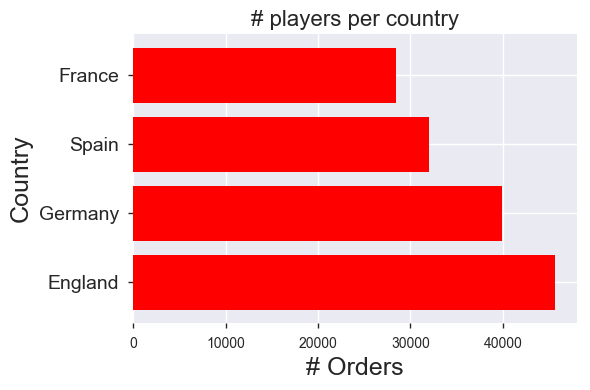

array([ 31.29605281,  27.3317446 ,  21.89785521,  19.47434739])

In [7]:
## Group by "leagueCountry"
freq_countries = df.groupby('leagueCountry')['playerShort'].count().reset_index()
freq_countries.sort_values(by='playerShort', ascending=False, inplace=True)

labels = freq_countries['leagueCountry'].values
y_pos = np.arange(len(labels))
percentage_countries = freq_countries['playerShort'].values/freq_countries['playerShort'].sum()

plt.clf()
fig = plt.figure(figsize=(6,4))
plt.barh(y_pos, freq_countries['playerShort'], align='center', color='red')
plt.title('# players per country', fontsize=16)
plt.xlabel('# Orders', fontsize=18)
plt.ylabel('Country', fontsize=18)
plt.yticks(y_pos, labels, fontsize=14)
plt.tight_layout()
plt.show(fig)
#plt.savefig('./figs/countries_fraction.png', bbox_inches='tight')
plt.close('all')

percentage_countries*100

0.1801024461062262 of the "height" entries are NaNs


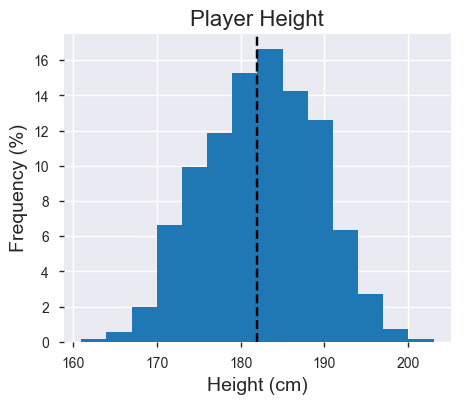

In [8]:
#Histogram of players heights

print(len(df[df.height.isnull()])/len(df.height)*100, 'of the "height" entries are NaNs')
weight_height = 100 * np.ones_like(df.height[~np.isnan(df.height)]) / df.height[~np.isnan(df.height)].size
mean_height = df.height.mean(skipna=True)
binwidth = 3

plt.clf()
fig = plt.figure(figsize=(5,4))
plt.hist(df.height[~np.isnan(df.height)], weights=weight_height, 
         bins=np.arange(min(df.height[~np.isnan(df.height)]), max(df.height[~np.isnan(df.height)]) + binwidth, binwidth))
plt.axvline(mean_height, color='black', linestyle='--')
plt.title("Player Height", fontsize=16)
plt.xlabel('Height (cm)', fontsize=14); plt.ylabel('Frequency (%)', fontsize=14)

plt.show()
plt.close()


1.536006793217739 of the "weight" entries are NaNs


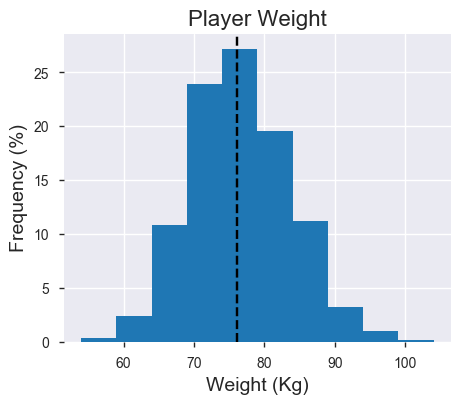

In [9]:
# Histogram of players weights

print(len(df[df.weight.isnull()])/len(df.weight)*100, 'of the "weight" entries are NaNs')
weight_weight = 100 * np.ones_like(df.weight[~np.isnan(df.weight)]) / df.weight[~np.isnan(df.weight)].size
mean_weight = df.weight.mean(skipna=True)
binwidth = 5

plt.clf()
fig = plt.figure(figsize=(5,4))
plt.hist(df.weight[~np.isnan(df.weight)], weights=weight_weight, 
         bins=np.arange(min(df.weight[~np.isnan(df.weight)]), max(df.weight[~np.isnan(df.weight)]) + binwidth, binwidth))
plt.axvline(mean_weight, color='black', linestyle='--')
plt.title("Player Weight", fontsize=16)
plt.xlabel('Weight (Kg)', fontsize=14); plt.ylabel('Frequency (%)', fontsize=14)

plt.show()
plt.close()


14.659517352836444 of the "rater1" entries are NaNs
14.659517352836444 of the "rater1" entries are NaNs


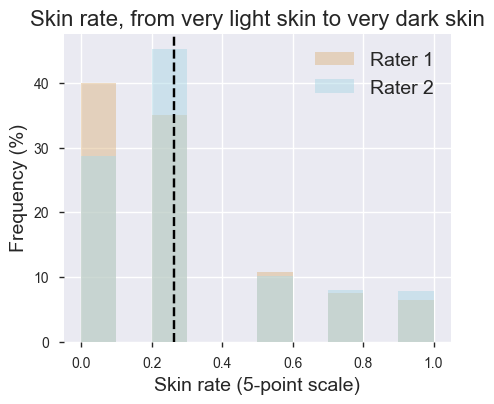

,rater1,rater2
0,0.25,0.50
1,0.75,0.75
5,0.25,0.00
6,0.00,0.25
7,1.00,1.00


In [10]:
# Histogram of skin rate
#5-point scale ranging from 'very light skin' to 'very dark skin'

print(len(df[df.rater1.isnull()])/len(df.rater1)*100, 'of the "rater1" entries are NaNs')
print(len(df[df.rater2.isnull()])/len(df.rater2)*100, 'of the "rater1" entries are NaNs')
weight_rater1 = 100 * np.ones_like(df.rater1[~np.isnan(df.rater1)]) / df.rater1[~np.isnan(df.rater1)].size
mean_rater1 = df.rater1.mean(skipna=True)
weight_rater2 = 100 * np.ones_like(df.rater2[~np.isnan(df.rater2)]) / df.rater2[~np.isnan(df.rater2)].size
mean_rater2 = df.rater2.mean(skipna=True)
binwidth = 0.1

plt.clf()
fig = plt.figure(figsize=(5,4))
plt.hist(df.rater1[~np.isnan(df.rater1)], weights=weight_rater1, alpha=0.5, label='Rater 1', color='burlywood')#,
         #bins=np.arange(min(df.rater1[~np.isnan(df.rater1)]), max(df.rater1[~np.isnan(df.rater1)]) + binwidth, binwidth))
plt.hist(df.rater2[~np.isnan(df.rater2)], weights=weight_rater2, alpha=0.5, label='Rater 2', color='lightblue')#,
         #bins=np.arange(min(df.rater2[~np.isnan(df.rater2)]), max(df.rater2[~np.isnan(df.rater2)]) + binwidth, binwidth))
plt.axvline(mean_rater1, color='black', linestyle='--')
plt.title("Skin rate, from very light skin to very dark skin", fontsize=16)
plt.xlabel('Skin rate (5-point scale)', fontsize=14); plt.ylabel('Frequency (%)', fontsize=14)
plt.legend(fontsize=14)

plt.show()
plt.close()

df[['rater1', 'rater2']][~df.rater1.isnull()].head()

## Goal: “Are soccer referees more likely to give red cards to dark skin toned players than light skin toned players?”

#### I can estimate the proportion of dark skin vs light skin players who received a red card (chi-square test of independence)

I will separate the players into light skin (rater < 0.5) and dark skin (rater > 0.5):

In [11]:
df_sel = df[~np.isnan(df.rater1)] #Discard NaN, since it is only 14% and we have enough datapoints.
df_light1 = df_sel[df_sel.rater1 <0.5]; df_light2 = df_sel[df_sel.rater2 <0.5]
df_dark1 = df_sel[df_sel.rater1 >=0.5]; df_dark2 = df_sel[df_sel.rater2 >=0.5]

print(len(df_light1)/len(df_sel)*100, '% of players have light skin, according to "rater1: and', 
      len(df_light2)/len(df_sel)*100, '% of players have light skin, according to "rater2"')

df_light1_red = df_sel[(df_sel.rater1 <0.5) & (df_sel.redCards == 1)]
df_dark1_red = df_sel[(df_sel.rater1 >=0.5) & (df_sel.redCards == 1)]

df_light2_red = df_sel[(df_sel.rater2 <0.5) & (df_sel.redCards == 1)]
df_dark2_red = df_sel[(df_sel.rater2 >=0.5) & (df_sel.redCards == 1)]

75.01303953587276 % of players have light skin, according to "rater1: and 73.98030829474969 % of players have light skin, according to "rater2"


The skin rating of the photo id based on the algorithm rater1 tends to have more lower values (lighter skin) than the rater2 algorithm. <br>
Let's focus on rater1 for now.

In [12]:
# Mean light skin playes getting a red card:
total_lr = df_light1_red.groupby('refNum')['player'].count().sum()
N_lr = len(df_light1_red.groupby('refNum').count())
mean_lr = total_lr/N_lr 
mean_lr = df_light1_red.groupby('refNum')['player'].count().mean() #mean for light and red
std_err_lr = df_light1_red.groupby('refNum')['player'].count().var() #variance for light and red
print(mean_lr, '+/-', std_err_lr)

2.7132530120481926 +/- 10.209848088004142


In [13]:
mean_dr = df_dark1_red.groupby('refNum')['player'].count().mean() #mean for dark and red
std_err_dr = df_dark1_red.groupby('refNum')['player'].count().var() #variance for dark and red

print(mean_dr, '+/-', std_err_dr)

1.640316205533597 +/- 1.4137649789823654


In [16]:
## Chi-square Test of Independence for rater1
from scipy.stats import chi2_contingency

chi2, p_value, dof, exp = chi2_contingency(
    [[len(df_light1_red.groupby('refNum')['player']), len(df_sel[(df_sel.rater1 <0.5)].groupby('refNum'))],
     [len(df_dark1_red.groupby('refNum')['player']), len(df_sel[(df_sel.rater1 >=0.5)].groupby('refNum'))] ])

print('p-value:', p_value)

p-value: 0.00113800785284


In [17]:
## Chi-square Test of Independence for rater2
from scipy.stats import chi2_contingency

chi2, p_value2, dof, exp = chi2_contingency(
    [[len(df_light2_red.groupby('refNum')['player']), len(df_sel[(df_sel.rater2 <0.5)].groupby('refNum'))],
     [len(df_dark2_red.groupby('refNum')['player']), len(df_sel[(df_sel.rater2 >=0.5)].groupby('refNum'))] ])

print('p-value:', p_value2)

p-value: 0.0013905468588


The p-value is the conditional probability (assuming that the null hypothesis is true) that the observed difference between both ratios is due to randomness. We typically want a p-value lower than 0.05 to discard the null hypothesis and confirm that the difference in the ratios is statistically significant. In this case, the p-value is much lower than 0.05, therefore we can reject the null hypothesis and conclude that there is a significant difference between light skin players that got a red card and dark skin players that got a red card.

#### Since the mean, standard error (NOT standard deviation) and sample size are provided, I can also run a T-test, to check if there is a signicant difference between dark skin toned players that receive a red card over light skin toned players that receive a red card.